In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download("stopwords")


URL = "https://www.famaf.unc.edu.ar/~nocampo043/ml_challenge2019_dataset.csv"
df = pd.read_csv(URL)

title = "title"
category = "category"
label_quality = "label_quality"
language = "language"

stopwords = \
    set(nltk.corpus.stopwords.words("spanish")) | \
    set(nltk.corpus.stopwords.words("portuguese"))

def proportion(df, by, col):
    df_proportion = df.groupby([by, col]) \
        .agg(count=(col, "count")) \
        .join(df.groupby(by).size() \
        .to_frame()) \
        .rename(columns={0: "total"})

    df_proportion["proportion"] = df_proportion["count"] / df_proportion["total"]
    return df_proportion

count_stopwords = lambda s: sum(
    w.lower() in stopwords for w in word_tokenize(s)
)

def count_special_chars(s):
    word_freq = nltk.FreqDist(s)
    special_chars = "[@_!#$%^&*()<>?/\|}{~:]"
    return sum(word_freq[sc] for sc in special_chars)

def count_digits(s):
    word_freq =  nltk.FreqDist(s)
    digits = "0123456789"
    return sum(word_freq[d] for d in digits)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/benjamin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 ## Publicaciones de items dentro de cada categoría

In [2]:

df.groupby(category).size()


category
BABY_CAR_SEATS        34163
BABY_STROLLERS        31353
COFFEE_MAKERS         35104
ELECTRIC_DRILLS       30820
HAIR_CLIPPERS         32372
KITCHEN_SINKS         30635
MATTRESSES            32967
MEMORY_CARDS          31564
MOTORCYCLE_JACKETS    32615
MUSICAL_KEYBOARDS     33222
PANTS                 35973
PUREBRED_DOGS         32928
RANGES                32645
REFRIGERATORS         32635
ROLLER_SKATES         31371
SEWING_MACHINES       31129
SHORTS                31685
SUITCASES             31580
WALL_CLOCKS           30600
WINES                 31399
dtype: int64

 ## Proporción de publicaciones en español y portugués dentro de cada categoría

In [3]:
proportion(df, category, language)

count  total  proportion
category           language                            
BABY_CAR_SEATS     portuguese  16290  34163    0.476832
                   spanish     17873  34163    0.523168
BABY_STROLLERS     portuguese  16244  31353    0.518100
                   spanish     15109  31353    0.481900
COFFEE_MAKERS      portuguese  17607  35104    0.501567
                   spanish     17497  35104    0.498433
ELECTRIC_DRILLS    portuguese  15044  30820    0.488125
                   spanish     15776  30820    0.511875
HAIR_CLIPPERS      portuguese  16474  32372    0.508897
                   spanish     15898  32372    0.491103
KITCHEN_SINKS      portuguese  14794  30635    0.482912
                   spanish     15841  30635    0.517088
MATTRESSES         portuguese  17310  32967    0.525071
                   spanish     15657  32967    0.474929
MEMORY_CARDS       portuguese  18257  31564    0.578412
                   spanish     13307  31564    0.421588
MOTORCYCLE_JACKETS portuguese  17079  32615    0.523655
                   spanish     15536  32615    0.476345
MUSICAL_KEYBOARDS  portuguese  15655  33222    0.471224
                   spanish     17567  33222    0.528776
PANTS              portuguese  18689  35973    0.519529
                   spanish     17284  35973    0.480471
PUREBRED_DOGS      portuguese  17909  32928    0.543884
                   spanish     15019  32928    0.456116
RANGES             portuguese  15140  32645    0.463777
                   spanish     17505  32645    0.536223
REFRIGERATORS      portuguese  14750  32635    0.451969
                   spanish     17885  32635    0.548031
ROLLER_SKATES      portuguese  17425  31371    0.555449
                   spanish     13946  31371    0.444551
SEWING_MACHINES    portuguese  14395  31129    0.462431
                   spanish     16734  31129    0.537569
SHORTS             portuguese  16051  31685    0.506580
                   spanish     15634  31685    0.493420
SUITCASES          portuguese  17358  31580    0.549652
                   spanish     14222  31580    0.450348
WALL_CLOCKS        portuguese  17335  30600    0.566503
                   spanish     13265  30600    0.433497
WINES              portuguese  15186  31399    0.483646
                   spanish     16213  31399    0.516354

 ## Proporción de label quality dentro de cada categoría

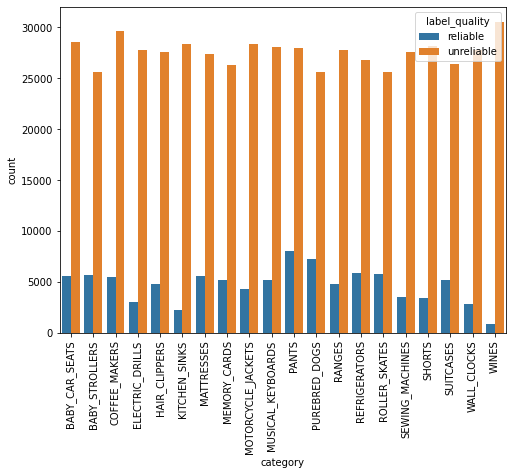

In [4]:
df_label_by_category = proportion(df, category, label_quality).reset_index()
fig = plt.figure(figsize=(8,6))
seaborn.barplot(
    y=df_label_by_category["count"],
    x=df_label_by_category["category"],
    hue=df_label_by_category["label_quality"],
    ci=None
)
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')

 ## Relación entre label quality e idioma

In [5]:
pd.crosstab(
    df[language],
    df[label_quality]
) / len(df)


label_quality,reliable,unreliable
language,,
portuguese,0.078111,0.430566
spanish,0.068593,0.422730


 ## Cantidad promedio de palabras del título por categoría

In [6]:
df_word_count = df[title].apply(lambda s: len(s.split(' '))) \
    .to_frame()\
    .rename(columns={"title": "word_count"})

df[[title, category]] \
    .join(df_word_count) \
    .groupby(category).agg(
        avg_word_count=("word_count", "mean")
)

,avg_word_count
category,
BABY_CAR_SEATS,8.028130
BABY_STROLLERS,7.412146
COFFEE_MAKERS,7.370983
ELECTRIC_DRILLS,8.384296
HAIR_CLIPPERS,8.181577
KITCHEN_SINKS,8.970034
MATTRESSES,8.094033
MEMORY_CARDS,9.346059
MOTORCYCLE_JACKETS,7.540702


In [7]:
df.join(df_word_count).describe()


,word_count
count,646760.000000
mean,7.704054
std,2.509832
min,1.000000
25%,6.000000
50%,8.000000
75%,9.000000
max,113.000000


 ## Cantidad de stopwords por título

In [8]:
df[title] \
    .apply(count_stopwords) \
    .to_frame()\
    .rename(columns={"title": "nof_stopwords"}) \
    .join(df_word_count)

,nof_stopwords,word_count
0,0,3
1,1,5
2,0,7
3,0,5
4,3,11
...,...,...
646755,0,5
646756,1,8
646757,0,9
646758,3,6


 ## Cantidad de números por título

In [9]:
df[title] \
    .apply(count_digits) \
    .to_frame()\
    .rename(columns={"title": "nof_numbers"})

,nof_numbers
0,0
1,0
2,5
3,3
4,3
...,...
646755,1
646756,0
646757,8
646758,0


In [10]:
df[title] \
    .apply(count_special_chars) \
    .to_frame()\
    .rename(columns={"title": "nof_numbers"})


,nof_numbers
0,0
1,0
2,0
3,0
4,2
...,...
646755,0
646756,0
646757,0
646758,0


In [11]:
dff = df[title] \
    .aggregate({
        "nof_stopwords": count_stopwords,
        "nof_digits": count_digits,
        "nof_special_chars": count_special_chars
    })